<a href="https://colab.research.google.com/github/MedYassineIHBACH/Numerical_analysis_methodes/blob/main/SIR_Model_Epidemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


### **Without Deads : mu = 0**

In [2]:
def SIR_model(s0,i0,r0,lam,beta):
  T = 30
  t = np.arange(0,T)
  n=len(t)
  delta_t = T / 30
  s = np.zeros(n)
  i = np.zeros(n)
  r = np.zeros(n)
  s[0] ,i[0] , r[0]= s0, i0, r0
  for j in range(1,n):
    s[j] = s[j-1] - beta * s[j-1] * i[j-1] * delta_t
    i[j] = i[j-1] + ( beta * s[j-1] * i[j-1] - (1/lam) * i[j-1] ) * delta_t
    r[j] = r[j-1] + (1/lam) * i[j-1]  * delta_t
  p = s+i+r
  return [ s , i , r , p , t ]


In [3]:
sir = SIR_model(0.7,0.3,0,8,0.5)

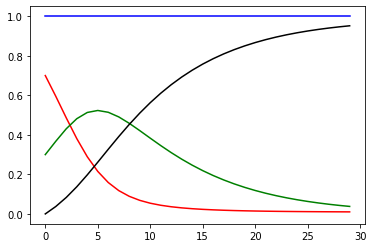

In [4]:
plt.plot(sir[4] , sir[0],'r')
plt.plot(sir[4] , sir[1],'g')
plt.plot(sir[4] , sir[2],'k')
plt.plot(sir[4], sir[3] ,'b')


# With Deads

In [5]:
def SIR_model_1(s0,i0,r0,lam,beta,mu):
  T = 30
  t = np.arange(0,T)
  n=len(t)
  delta_t = T / 30
  s = np.zeros(n)
  i = np.zeros(n)
  r = np.zeros(n)
  s[0] ,i[0] , r[0]= s0, i0, r0
  for j in range(1,n):
    s[j] = s[j-1] - beta * s[j-1] * i[j-1] * delta_t
    i[j] = i[j-1] + ( beta * s[j-1] * i[j-1] - ((1/lam) + mu ) * i[j-1]  ) * delta_t
    r[j] = r[j-1] + (1/lam) * i[j-1]  * delta_t
  p = s+i+r
  return [ s , i , r , p , t ]

In [6]:
sir = SIR_model_1(0.7,0.3,0,8,0.5,0.00)

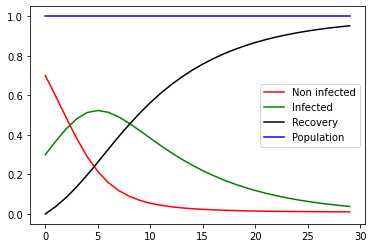

In [7]:
plt.plot(sir[4] , sir[0],'r',label='Non infected')
plt.plot(sir[4] , sir[1],'g',label='Infected')
plt.plot(sir[4] , sir[2],'k',label='Recovery')
plt.plot(sir[4], sir[3] ,'b',label='Population')
plt.legend()
plt.show()

# Implicite

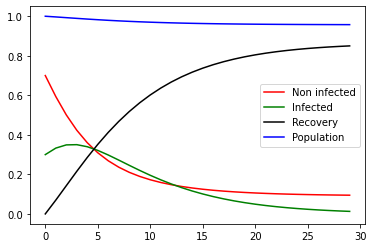

In [8]:
def SIR_model_implicite(s0,i0,r0,lam,beta,mu):
  T = 30
  t = np.arange(0,T)
  n=len(t)
  delta_t = T / 30
  s = np.zeros(n)
  i = np.zeros(n)
  r = np.zeros(n)
  s[0] ,i[0] , r[0]= s0, i0, r0
  for j in range(1,n):
    # point fixe 
    s_n = s[j-1] / ( 1 + beta * i[j-1] * delta_t )
    i_n = i[j-1] / ( 1 + ( 1/lam + mu - beta * s[j-1] ) * delta_t )

    s[j] = s[j-1] - beta * s_n * i_n * delta_t
    i[j] = i[j-1] + ( beta * s_n * i_n - ((1/lam) + mu ) * i_n  ) * delta_t
    r[j] = r[j-1] + (1/lam) * i_n * delta_t
  p = s + i + r
  return [ s , i , r , p , t ]
sir = SIR_model_implicite(0.7,0.3,0,5,0.5,0.01)
plt.plot(sir[4] , sir[0],'r',label='Non infected')
plt.plot(sir[4] , sir[1],'g',label='Infected')
plt.plot(sir[4] , sir[2],'k',label='Recovery')
plt.plot(sir[4], sir[3] ,'b',label='Population')
plt.legend()
plt.show()

In [9]:
def heun(a,b,N):
  y=[0]
  h = (b-a) / N
  x = np.arange(a,b+ h , h)
  for i in range(1,len(x)):
    k1 = f(x[i-1],y[i-1])
    k2 = f(x[i-1]+ h  ,y[i-1] + k1 * h )
    y.append(y[i-1]+ ( h / 2 ) * ( k1 + k2 ))
  y=np.array(y)
  return y 

# **Heun**

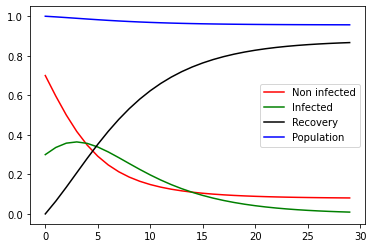

In [10]:
def SIR_model_heun(s0,i0,r0,lam,beta,mu):
  T = 30
  t = np.arange(0,T)
  n=len(t)
  delta_t = T / 30
  s = np.zeros(n)
  i = np.zeros(n)
  r = np.zeros(n)
  s[0] ,i[0] , r[0]= s0, i0, r0
  for j in range(1,n):
    s_n = s[j-1] - beta * s[j-1] * i[j-1] * delta_t
    i_n = i[j-1] + ( beta * s[j-1] * i[j-1] - (1/lam) * i[j-1] ) * delta_t

    s[j] = s[j-1] - (delta_t / 2) * (beta * ( s[j-1] * i[j-1] + s_n * i_n ))
    i[j] = i[j-1] + (delta_t/2) * ( beta * (s_n * i_n + s[j-1] * i[j-1] ) - ((1/lam) + mu ) * ( i_n + i[j-1] ))
    r[j] = r[j-1] + (delta_t / 2 ) * (1/lam ) * ( i_n + i[j-1] )
  p = s + i + r
  return [ s , i , r , p , t ]
sir = SIR_model_heun(0.7,0.3,0,5,0.5,0.01)
plt.plot(sir[4] , sir[0],'r',label='Non infected')
plt.plot(sir[4] , sir[1],'g',label='Infected')
plt.plot(sir[4] , sir[2],'k',label='Recovery')
plt.plot(sir[4], sir[3] ,'b',label='Population')
plt.legend()
plt.show()

# **Runge kutta 4**

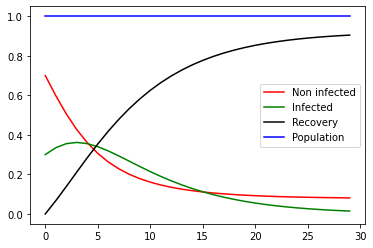

In [11]:
def SIR_model_kutta_4(s0,i0,r0,lam,beta,mu):
  T = 30
  t = np.arange(0,T)
  n=len(t)
  delta_t = T / 30
  s = np.zeros(n)
  i = np.zeros(n)
  r = np.zeros(n)
  s[0] ,i[0] , r[0]= s0, i0, r0
  for j in range(1,n):

    k1_sn = delta_t * (- beta * s[j-1] * i[j-1] )
    k1_in = delta_t * ( beta * s[j-1] * i[j-1] - (1/lam + mu ) * i[j-1] )
    k1_rn = delta_t * (1 / lam ) * i[j-1]
                       
    s_n = s[j-1] + k1_sn / 2
    i_n = i[j-1] + k1_in / 2
    r_n = r[j-1] + k1_rn / 2

    k2_sn = delta_t * ( - beta * s_n * i_n )
    k2_in = delta_t * ( beta * s_n * i_n - (1/lam + mu) * i_n )
    k2_rn = delta_t * (1/lam) * i_n


    s_n = s_n + k2_sn / 2
    i_n = i_n + k2_in / 2
    r_n = r_n + k2_rn / 2

    k3_sn = delta_t * ( - beta * s_n * i_n )
    k3_in = delta_t * ( beta * s_n * i_n - (1/lam + mu ) * i_n )
    k3_rn = delta_t * (1/lam) * i_n

    s_n = s_n + k3_sn
    i_n = i_n + k3_in 
    r_n = r_n + k3_rn

    k4_sn = delta_t * ( - beta * s_n * i_n )
    k4_in = delta_t * ( beta * s_n * i_n - (1/lam + mu) * i_n )
    k4_rn = delta_t * (1/lam) * i_n


    s[j] = s[j-1] + (k1_sn + k4_sn) / 6 + ( k2_sn + k3_sn )/3
    i[j] = i[j-1] + (k1_in + k4_in) / 6 + ( k2_in + k3_in )/3
    r[j] = r[j-1] + (k1_rn + k4_rn) / 6 + ( k2_rn + k3_rn )/3
  p = s + i + r
  return [ s , i , r , p , t ]
sir = SIR_model_kutta_4(0.7,0.3,0,5,0.5,0.00)
plt.plot(sir[4] , sir[0],'r',label='Non infected')
plt.plot(sir[4] , sir[1],'g',label='Infected')
plt.plot(sir[4] , sir[2],'k',label='Recovery')
plt.plot(sir[4], sir[3] ,'b',label='Population')
plt.legend()
plt.show()